CIFAR-10 classification with k-NN
---

> **Exercise**: Load the data from the `cifar10-6k.npz` file into X/y arrays. The data type of the input matrix `X` should be `float64`. Split it into train (5,000 images) and test (1,000) sets using the `train_test_split()` function. Set the `random_state` to zero. 

In [28]:
import numpy as np
import os
from sklearn.model_selection import train_test_split

with np.load(os.path.join('.','cifar10-6k.npz'), allow_pickle=False) as npz_file:
    data=dict(npz_file.items())

print(data.keys())
print(data['labels'])

X=data['data'].astype('float')
y=data['labels']
names=data['names']
X_tr, X_te, y_tr,y_te=train_test_split(X, y, test_size=1000/len(y), random_state=0)

print("Shape of X_tr: {}".format(X_tr.shape))
print("Shape of y_tr: {}".format(y_tr.shape))
print("Shape of X_te: {}".format(X_te.shape))
print("Shape of y_te: {}".format(y_te.shape))


dict_keys(['data', 'labels', 'names'])
[6 9 9 ... 9 4 8]
Shape of X_tr: (5000, 3072)
Shape of y_tr: (5000,)
Shape of X_te: (1000, 3072)
Shape of y_te: (1000,)


Exercise: Data exploration
---

The ten categories are numerically encoded with digits between 0 and 9.

| digit | category   | digit | category   |
|-------|------------|-------|------------|
| 0     | airplane   | 5     | dog        |
| 1     | automobile | 6     | frog       |
| 2     | bird       | 7     | horse      |
| 3     | cat        | 8     | ship       |
| 4     | deer       | 9     | truck      |

> **Exercise**: What is the proportion of images in each category? Plot a few images from the data set.

In [29]:
import pandas as pd

df_categories=pd.DataFrame(y, columns=['category'])

df_categories['count']=1
df_proportion=df_categories.groupby('category').sum()
df_proportion['percentage']=df_proportion['count']/len(y)
df_proportion.sort_values('percentage', ascending=False)

,count,percentage
category,,
8,620,0.103333
2,619,0.103167
6,616,0.102667
9,613,0.102167
4,611,0.101833
0,610,0.101667
7,597,0.099500
5,583,0.097167
3,580,0.096667


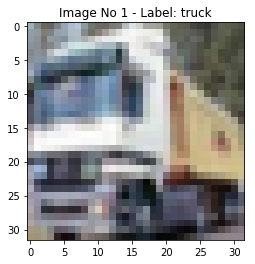

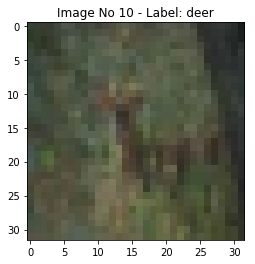

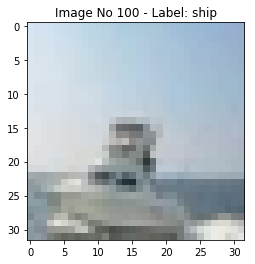

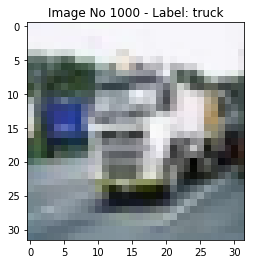

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot image 1, 10, 100 and 1000

for i in [1, 10, 100, 1000]:
    plt.imshow(X[i].reshape(32,32,3)/255)
    plt.title("Image No {} - Label: {}".format(i, names[y[i]]))
    plt.show()

Exercise: Fit a *k*-NN classifier
---

> **Exercise**: Create a *k*-NN classifer and tune it using grid search for the following hyperparameters.
> 1. The number of neighbors: define a set of reasonable values
> 1. The weighting function: "uniform" or "distance"
> 1. The distance metric: L1 or L2

In [ ]:
# Grid seacrh using ParameterGrid

from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Define a set of reasonable values
k_values = np.arange(1, 21) # 1, 2, 3, .., 20
weights_functions = ['uniform', 'distance']
distance_types = [1, 2] # L1, L2 distances
scaler=[None, StandardScaler()]

grid=ParameterGrid({
    'scaler': scaler,
    'knn__n_neighbors': k_values,
    'knn__weights': weights_functions,
    'knn__p': distance_types,
})

print("Number of combinaison:", len(grid))

pipe=Pipeline([
    ('scaler',StandardScaler()),
    ('knn', KNeighborsClassifier())
])

grid_result=[]

for grid_params in grid:
    pipe.set_params(**grid_params)
    
    pipe.fit(X_tr, y_tr)
    
    grid_params['accuracy']=pipe.score(X_te, y_te)
    
    grid_result.append(grid_params)
    


Number of combinaison: 160


In [ ]:
df=pd.DataFrame(grid_result)
df.head()